In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as signal

import sys
sys.path.append('../data')
from data import load_data

sns.set_style('darkgrid')

In [7]:
def open_data(fpath, fname):
    mat = load_data(fpath, fname)
    df = pd.DataFrame(mat['data'], columns=['amp'])
    df['amp_mean'] = df.amp - df.amp.mean()
    return df



In [8]:
# Load data
fpath = "/Users/granosftp/Documents/GitHub/Tesis/data"
fname = "datosconsu_021023_bajos.mat"

df = open_data(fpath, fname)

In [9]:
df.head()

,amp,amp_mean
0,5.326740,-0.727920
1,5.335618,-0.719042
2,5.460895,-0.593765
3,5.491145,-0.563515
4,5.615436,-0.439224


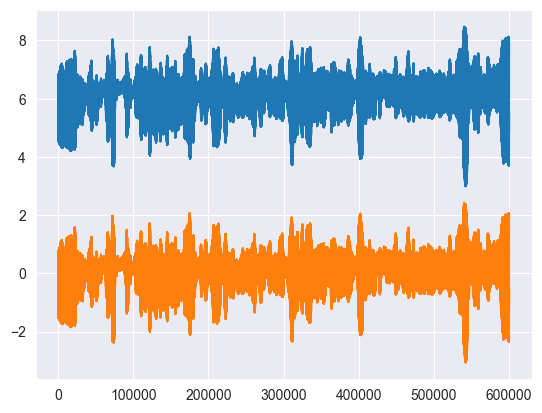

In [12]:
plt.plot(df.amp)
plt.plot(df.amp_mean)
plt.show()

In [13]:
def filter_signal(cutoff, df):
    if len(cutoff) == 2:
        b, a = signal.butter(4, cutoff, 'bandpass', analog=False)
        df['amp_filt'] = signal.filtfilt(b, a, df.amp_mean)
    else:
        b, a = signal.butter(4, cutoff, 'lowpass', analog=False)
        df['amp_filt'] = signal.filtfilt(b, a, df.amp_mean)
    return df
    

In [19]:
cutoff = [15/1000]
df = filter_signal(cutoff, df)
df.head()

,amp,amp_mean,amp_filt
0,5.326740,-0.727920,-0.632669
1,5.335618,-0.719042,-0.608368
2,5.460895,-0.593765,-0.584615
3,5.491145,-0.563515,-0.561441
4,5.615436,-0.439224,-0.538877


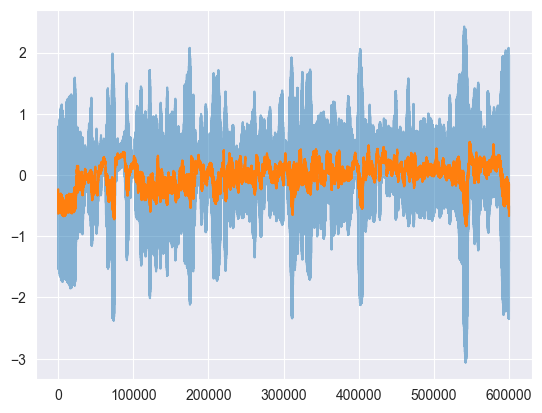

In [20]:
plt.plot(df.amp_mean, alpha = 0.5)
plt.plot(df.amp_filt)
plt.show()

In [21]:
# hilbert transform to get the envelope and its a new dataframe

def hilbert_transform(df, column):
    output = pd.DataFrame()
    analytic_signal = signal.hilbert(df.amp_filt)
    phase_instant = np.unwrap(np.angle(analytic_signal))
    freq_instant = np.diff(phase_instant) / (2.0*np.pi) * 1000
    freq_instant = np.insert(freq_instant, 0, freq_instant[0]) #agrego el primer valor para que queden la misma cantidad de filas.

    #asigno columnas al dataframe de salida.
    output['Hilbert'] = analytic_signal
    output['amp_envelope'] = np.abs(analytic_signal)
    output['phase_instant'] = phase_instant
    output['freq_instant'] = freq_instant
    

    return output

In [31]:
hilbert =  hilbert_transform(df, 'amp_filt')
hilbert.tail()

,Hilbert,amp_envelope,phase_instant,freq_instant
599995,-0.144440+0.665257j,0.680757,2892.049839,-3.365934
599996,-0.143858+0.658987j,0.674507,2892.050968,0.179656
599997,-0.143379+0.757117j,0.770573,2892.023197,-4.419927
599998,-0.142990+0.746478j,0.760050,2892.025298,0.334490
599999,-0.142679+1.048429j,1.058093,2891.971295,-8.594825


In [1]:
import sys
sys.path.append('../Librerias')
import dataset as ds


In [2]:
fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/"
fname = "datosconsu_021023_bajos.mat"
cutoff = [9/1000, 15/1000]

df = ds.MatFileToDataFrame(fpath, fname)

In [7]:
frame = df.get_dataframe(cutoff)
frame.head()

,Original Signal,Signal - Mean,Filtered Signal,Hilbert Transform
0,5.326740,-0.727920,0.221597,0.221597-0.349512j
1,5.335618,-0.719042,0.235994,0.235994-0.248638j
2,5.460895,-0.593765,0.250132,0.250132-0.255910j
3,5.491145,-0.563515,0.263968,0.263968-0.221706j
4,5.615436,-0.439224,0.277457,0.277457-0.223220j


In [8]:
import matplotlib.pyplot as plt

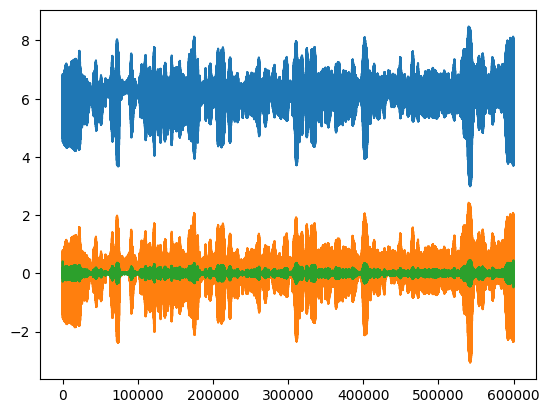

In [11]:
plt.plot(frame['Original Signal'])
plt.plot(frame['Signal - Mean'])
plt.plot(frame['Filtered Signal'])
plt.show()